<style>
    div#header-container {
        display: none;
    }
</style>


# Importando bibliotecas

In [59]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados

In [60]:
# Carregando dados
data = pd.read_csv ('Financials.csv',sep =",")
data.shape

(700, 16)

# Visualização dos dados

In [61]:
# Visualizando as primeiras linhas
data.head(10)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
5,Government,Germany,Carretera,None,"$1,513.00",$3.00,$350.00,"$5,29,550.00",$-,"$5,29,550.00","$3,93,380.00","$1,36,170.00",01/12/2014,12,December,2014
6,Midmarket,Germany,Montana,None,$921.00,$5.00,$15.00,"$13,815.00",$-,"$13,815.00","$9,210.00","$4,605.00",01/03/2014,3,March,2014
7,Channel Partners,Canada,Montana,None,"$2,518.00",$5.00,$12.00,"$30,216.00",$-,"$30,216.00","$7,554.00","$22,662.00",01/06/2014,6,June,2014
8,Government,France,Montana,None,"$1,899.00",$5.00,$20.00,"$37,980.00",$-,"$37,980.00","$18,990.00","$18,990.00",01/06/2014,6,June,2014
9,Channel Partners,Germany,Montana,None,"$1,545.00",$5.00,$12.00,"$18,540.00",$-,"$18,540.00","$4,635.00","$13,905.00",01/06/2014,6,June,2014


In [62]:
# informações sobre o número de entradas, tipos de dados e valores nulos em cada coluna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [63]:
# verificando o nome das colunas
data.columns.values

array(['Segment', 'Country', ' Product ', ' Discount Band ',
       ' Units Sold ', ' Manufacturing Price ', ' Sale Price ',
       ' Gross Sales ', ' Discounts ', '  Sales ', ' COGS ', ' Profit ',
       'Date', 'Month Number', ' Month Name ', 'Year'], dtype=object)

# Tratamento dos dados

In [64]:
# Removendo espaços em branco extras nos nomes das colunas
data.columns = [col.strip() for col in data.columns]

In [65]:
# Removendo o caracter , das colunas
data = data.replace({'\,':'','\$':'','\-':'','\.':''}, regex=True)


In [66]:
# Verificando o que foi tratado 
data.head(10)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,161850,300,2000,3237000,,3237000,1618500,1618500,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,132100,300,2000,2642000,,2642000,1321000,1321000,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,217800,300,1500,3267000,,3267000,2178000,1089000,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,88800,300,1500,1332000,,1332000,888000,444000,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,247000,300,1500,3705000,,3705000,2470000,1235000,01/06/2014,6,June,2014
5,Government,Germany,Carretera,None,151300,300,35000,52955000,,52955000,39338000,13617000,01/12/2014,12,December,2014
6,Midmarket,Germany,Montana,None,92100,500,1500,1381500,,1381500,921000,460500,01/03/2014,3,March,2014
7,Channel Partners,Canada,Montana,None,251800,500,1200,3021600,,3021600,755400,2266200,01/06/2014,6,June,2014
8,Government,France,Montana,None,189900,500,2000,3798000,,3798000,1899000,1899000,01/06/2014,6,June,2014
9,Channel Partners,Germany,Montana,None,154500,500,1200,1854000,,1854000,463500,1390500,01/06/2014,6,June,2014


In [67]:
# Verificando valores NAs em todas as colunas
total_missing_values = data.isnull().sum()
print(total_missing_values)

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64


In [68]:
# Verificando valores em branco em todas as colunas
missing_values = data.isna().sum()
print(missing_values)


Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64


In [69]:
# Definindo colunas numericas
monetary_columns = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']


In [70]:
# Substituindo espaços por zeros e convertendo para tipo int
for col in monetary_columns:
    data[col] = data[col].replace(' ', '0')
    data[col] = pd.to_numeric(data[col], errors='coerce').astype('Int64')

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Segment              700 non-null    object
 1   Country              700 non-null    object
 2   Product              700 non-null    object
 3   Discount Band        700 non-null    object
 4   Units Sold           700 non-null    Int64 
 5   Manufacturing Price  700 non-null    Int64 
 6   Sale Price           700 non-null    Int64 
 7   Gross Sales          700 non-null    Int64 
 8   Discounts            647 non-null    Int64 
 9   Sales                700 non-null    Int64 
 10  COGS                 700 non-null    Int64 
 11  Profit               637 non-null    Int64 
 12  Date                 700 non-null    object
 13  Month Number         700 non-null    int64 
 14  Month Name           700 non-null    object
 15  Year                 700 non-null    int64 
dtypes: Int64

In [72]:
# Modificando o formato das datas e verificando
date_column = 'Date'
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
first_date = data[date_column].iloc[0]
print("Formato da coluna 'Date':", first_date.strftime('%d-%m-%Y'))

Formato da coluna 'Date': 01-01-2014


# Análise dos Dados

In [73]:
# Análise estatística das colunas numéricas
cols = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']
data[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Units Sold,700.0,1.608294e+05,8.674279e+04,20000.0,90500.0,154250.0,222912.5,449250.0
Manufacturing Price,700.0,9.647714e+03,1.086026e+04,300.0,500.0,1000.0,25000.0,26000.0
Sale Price,700.0,1.184286e+04,1.367755e+04,700.0,1200.0,2000.0,30000.0,35000.0
Gross Sales,700.0,1.827594e+07,2.542623e+07,179900.0,1739175.0,3798000.0,27902500.0,120750000.0
Discounts,647.0,1.422759e+06,2.356283e+06,1841.0,106100.0,310800.0,1880925.0,14967750.0
Sales,700.0,1.696091e+07,2.367263e+07,165508.0,1592800.0,3554020.0,26107750.0,115920000.0
COGS,700.0,1.454752e+07,2.038655e+07,91800.0,749000.0,2250625.0,24560750.0,95062500.0
Profit,637.0,2.774101e+06,4.305933e+06,28560.0,387585.0,1110610.0,2516200.0,26220000.0


In [74]:
# Agrupando os dados por mês e calculando as somas de vendas e lucro
monthly_data = data.groupby(data['Date'].dt.to_period('M')).sum()

In [75]:
# Converte os períodos de volta para datas
monthly_data.index = monthly_data.index.to_timestamp()

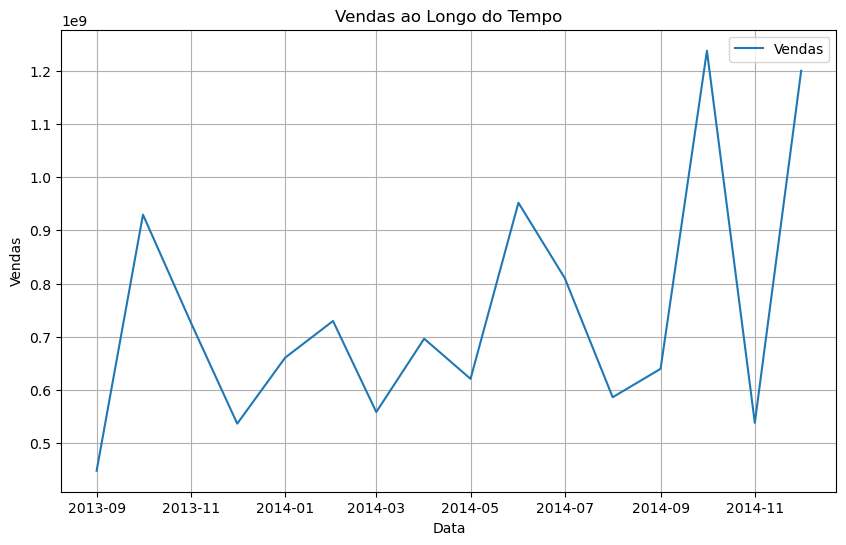

In [76]:
# Gráfico de vendas ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Sales'], label='Vendas')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Vendas ao Longo do Tempo')
plt.legend()
plt.grid()

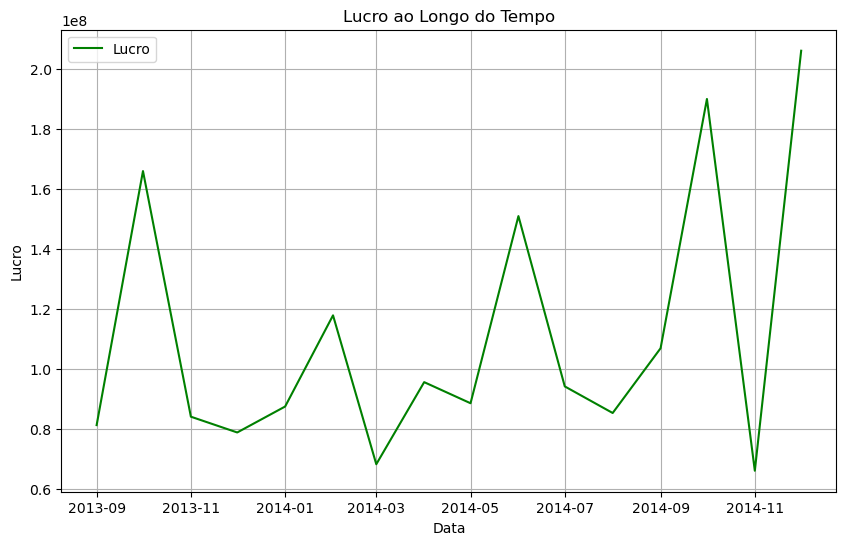

In [35]:
# Gráfico de lucro ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Profit'], label='Lucro', color='green')
plt.xlabel('Data')
plt.ylabel('Lucro')
plt.title('Lucro ao Longo do Tempo')
plt.legend()
plt.grid()

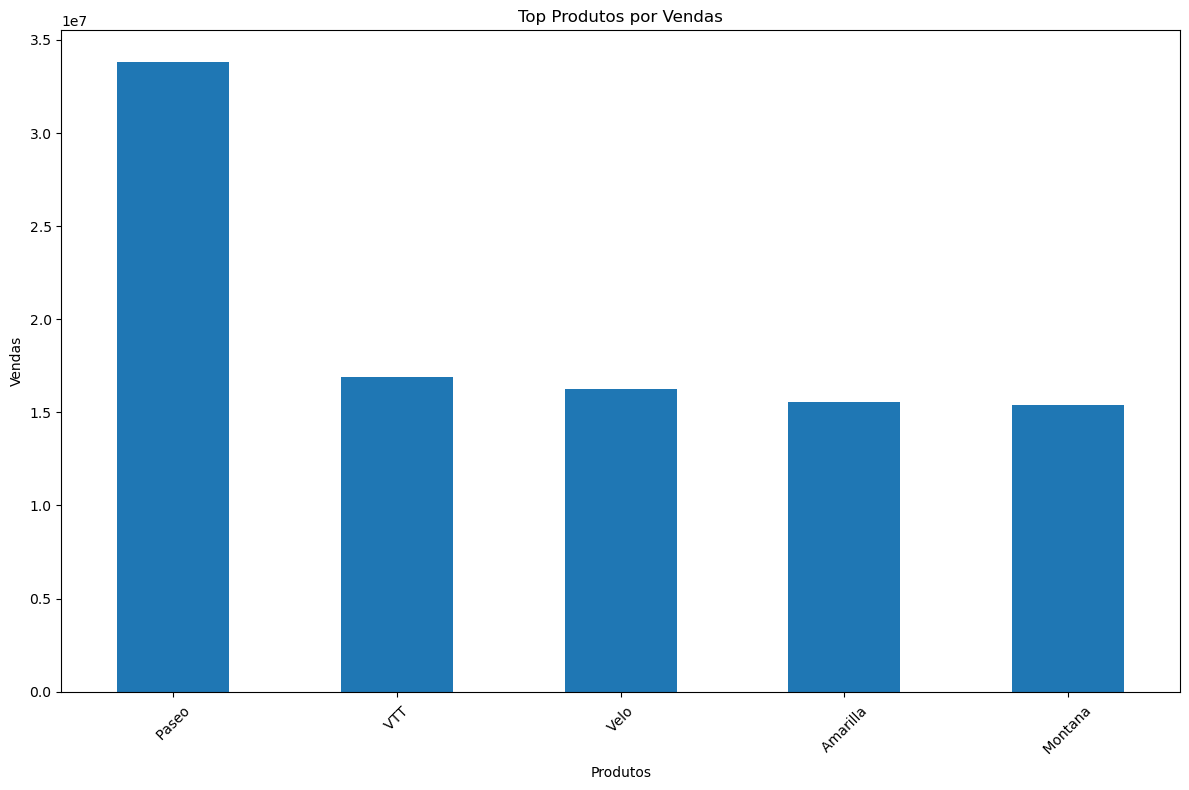

In [77]:
# Gráfico de produtos masi vendidos

# Agrupar por produto e somar as quantidades vendidas
product_sales = data.groupby('Product')['Units Sold'].sum()

# Classificar os produtos pelas vendas em ordem decrescente
sorted_products = product_sales.sort_values(ascending=False)

# Obter os produtos com as maiores vendas
top_products = sorted_products.head() 

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))  
top_products.plot(kind='bar')
plt.title('Top Produtos por Vendas')  
plt.xlabel('Produtos')  
plt.ylabel('Vendas')  
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()  

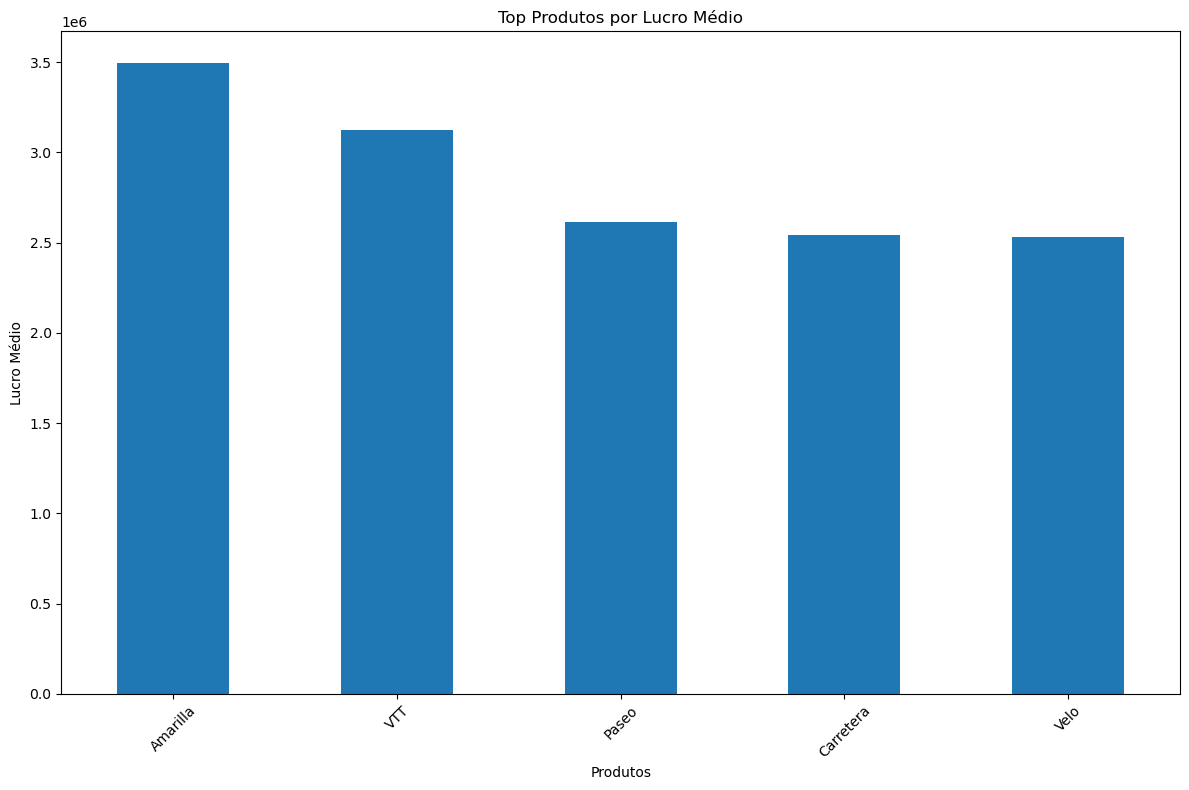

In [56]:
#Gráfico de lucro médio dos produtos

# Agrupar por produto e calcular a média dos lucros
product_profit = data.groupby('Product')['Profit'].mean()

# Classificar os produtos pelos lucros em ordem decrescente
sorted_products = product_profit.sort_values(ascending=False)

# Obter os produtos com os maiores lucros médios
top_products = sorted_products.head()  # Altere o número para a quantidade desejada

# Definir um tamanho adequado para a figura do gráfico
plt.figure(figsize=(12, 8))

# Criar o gráfico de barras
top_products.plot(kind='bar')
plt.title('Top Produtos por Lucro Médio') 
plt.xlabel('Produtos')  
plt.ylabel('Lucro Médio') 
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  


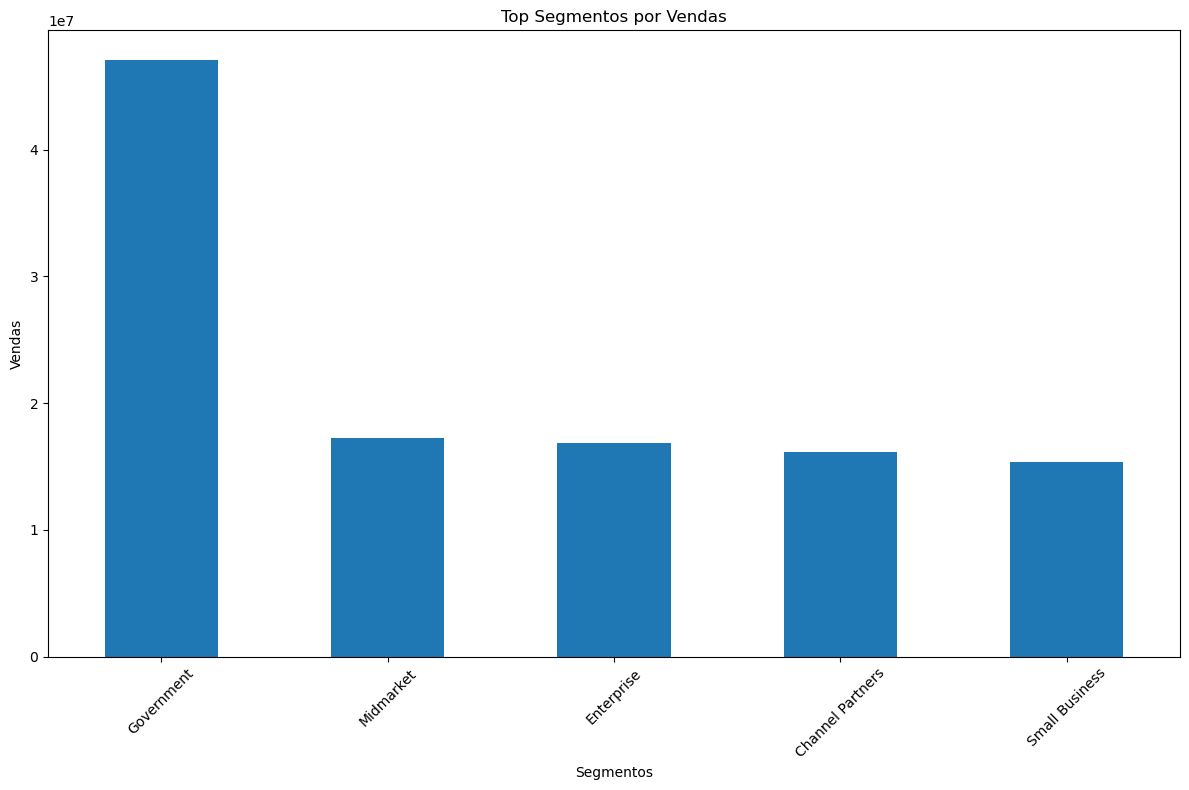

In [78]:
# Gráfico de vendas por Segmento

# Agrupar por segmento e somar as quantidades vendidas
segment_sales = data.groupby('Segment')['Units Sold'].sum()

# Classificar os segmentos pelas vendas em ordem decrescente
sorted_segments = segment_sales.sort_values(ascending=False)

# Obter os segmentos com as maiores vendas
top_segments = sorted_segments.head() 

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))  
top_segments.plot(kind='bar')
plt.title('Top Segmentos por Vendas') 
plt.xlabel('Segmentos')  
plt.ylabel('Vendas')  
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()  


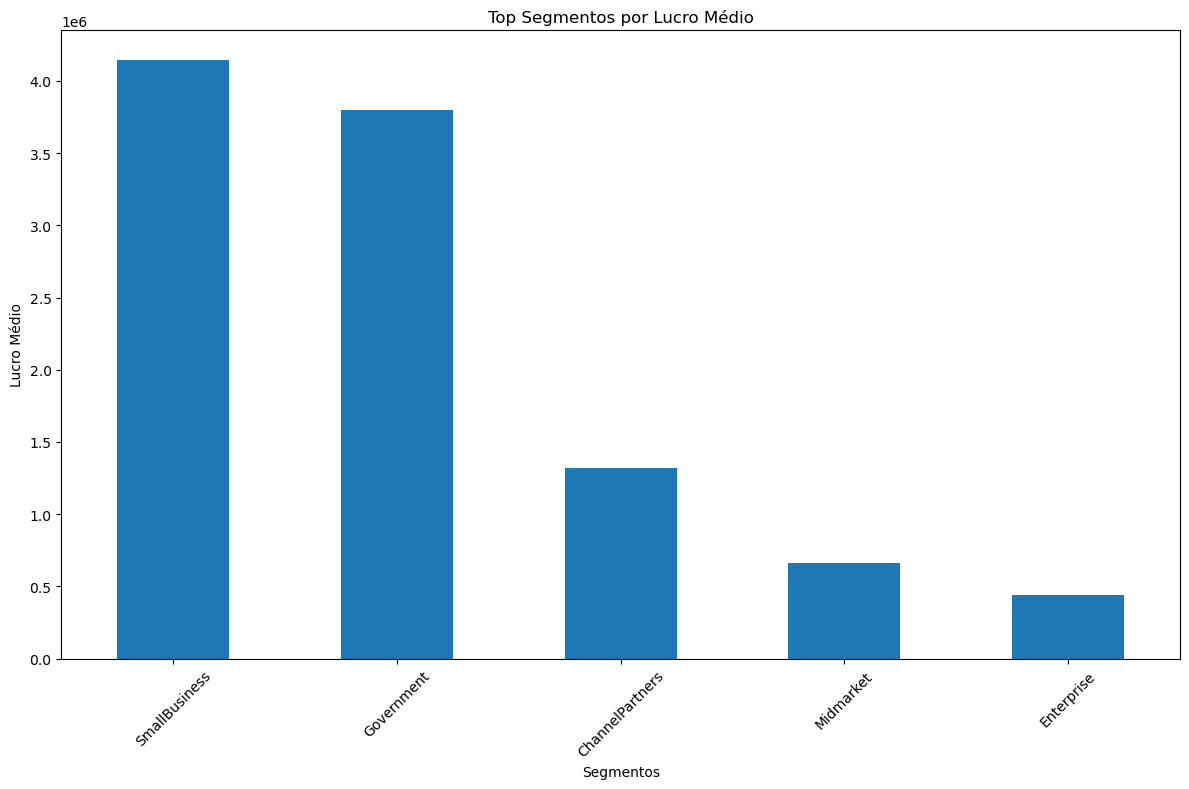

In [53]:
# Gráfico de lucro médio por segmento

# Agrupar por segmento e calcular a média dos lucros
segment_profit = data.groupby('Segment')['Profit'].mean()

# Classificar os segmentos pelos lucros em ordem decrescente
sorted_segments = segment_profit.sort_values(ascending=False)

# Obter os segmentos com os maiores lucros
top_segments = sorted_segments.head()  

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))  
top_segments.plot(kind='bar')
plt.title('Top Segmentos por Lucro Médio')  
plt.xlabel('Segmentos')  
plt.ylabel('Lucro Médio')  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  


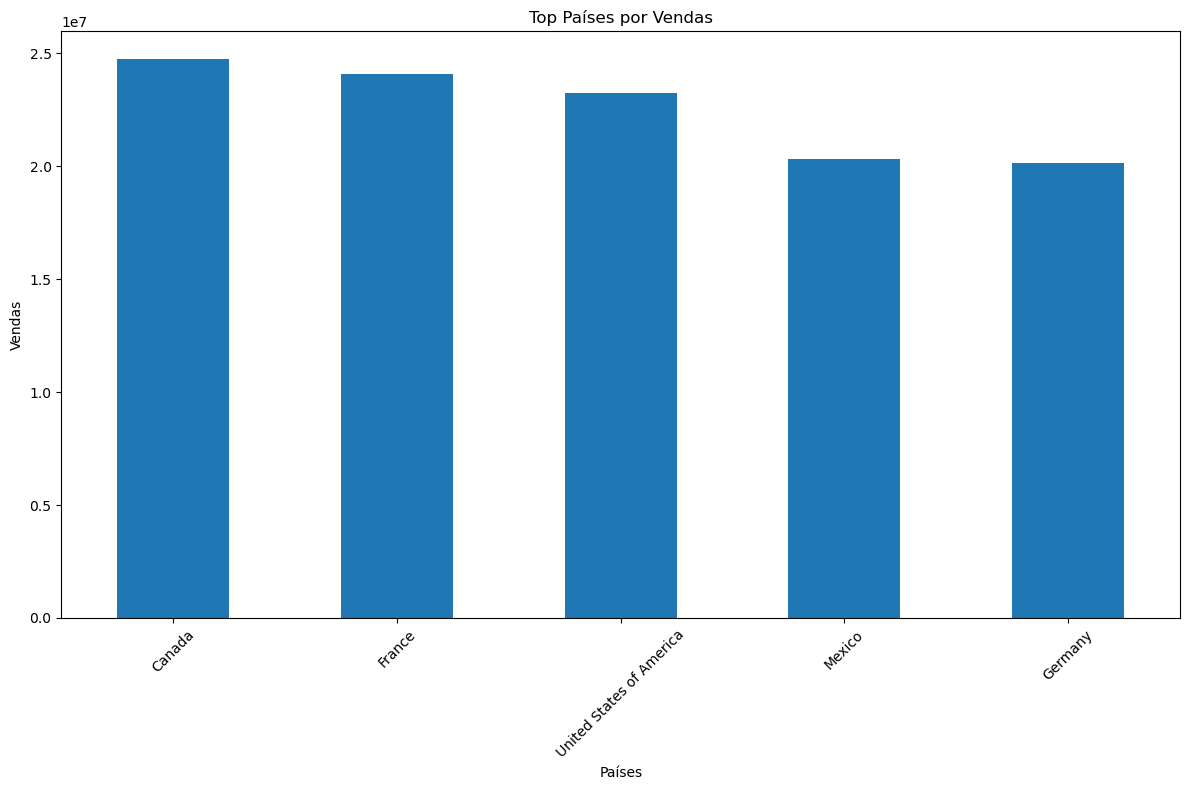

In [79]:
#Gráfico de vendas por países

# Agrupar por país e somar as quantidades vendidas
country_sales = data.groupby('Country')['Units Sold'].sum()

# Classificar os países pelas vendas em ordem decrescente
sorted_countries = country_sales.sort_values(ascending=False)

# Obter os países com as maiores vendas
top_countries = sorted_countries.head()  

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))  
top_countries.plot(kind='bar')
plt.title('Top Países por Vendas')  
plt.xlabel('Países')  
plt.ylabel('Vendas')  
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()  

<Figure size 1200x800 with 0 Axes>

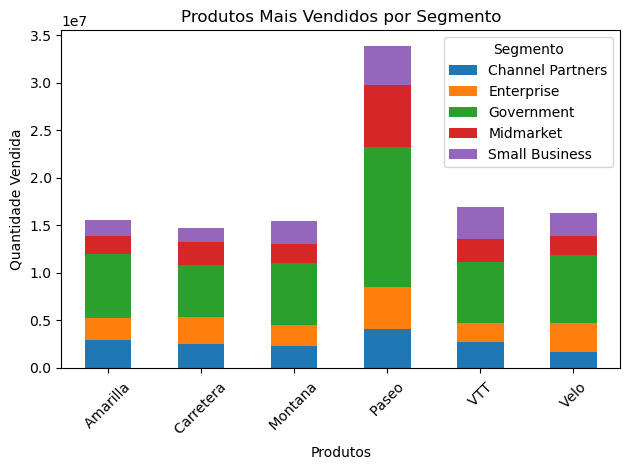

In [80]:
# Gráfico de barra empilhada com produtos mais vendidos em cada segmento

# Criar uma tabela pivô para calcular as vendas de cada produto em cada segmento
pivot_table = data.pivot_table(index='Product', columns='Segment', values='Units Sold', aggfunc='sum')


plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', stacked=True)
plt.title('Produtos Mais Vendidos por Segmento') 
plt.xlabel('Produtos') 
plt.ylabel('Quantidade Vendida')  
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.legend(title='Segmento') 
plt.show()  